# Day 2 GFG ML course

Here i am going to do EDA of netflix dataset <br><br>
### In-Depth Exploratory Data Analysis (EDA)
#### Netflix Content Analysis 🎬

### Step 1: Setup - Importing Libraries

As always, we begin by importing our essential data science toolset, including a new library for word clouds.

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

sns.set_style('darkgrid')

### Step 2: Data Loading and Initial Inspection

We'll load the `netflix_titles.csv` dataset and perform a high-level overview.

In [47]:
## cloning into the titanic dataset library
!git clone 'https://github.com/HarshvardhanSingh-13/Datasets'

fatal: destination path 'Datasets' already exists and is not an empty directory.


In [48]:
## creating a pandas dataframe from the titanic dataset
df = pd.read_csv('/content/Datasets/Netflix_Titles Dataset/netflix_titles.csv')

In [49]:
df.tail(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [51]:
df.describe() ## since only release_year has numeric dtype

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [52]:
df["country"].value_counts()

,count
country,
United States,2555
India,923
United Kingdom,397
Japan,226
South Korea,183
...,...
"Germany, United States, United Kingdom, Canada",1
"Peru, United States, United Kingdom",1
"Saudi Arabia, United Arab Emirates",1


here we can observe that many countries are clubbed in some entries that also acts as a seperate type

In [53]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


we have missing values in the `director` , `cast` , `country` , `rating` , `date_added` which needs to be preprocessed

### Step 3: Data Cleaning and Transformation

This step is critical for ensuring our analysis is accurate. We will handle missing values and correct data types.

In [54]:
## 1. Handle Missing values of 'director' and 'cast'
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')

In [55]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,507
date_added,10
release_year,0
rating,7
duration,0


In [56]:
## 2. Handling Missing Values for 'Country'
df['country'] = df['country'].fillna(df['country'].mode()[0])

In [57]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,10
release_year,0
rating,7
duration,0


In [58]:
## since we have less number of data with Null in these catagory we drop them
df.dropna(subset=['date_added','rating'],inplace=True)


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7770 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7770 non-null   object
 1   type          7770 non-null   object
 2   title         7770 non-null   object
 3   director      7770 non-null   object
 4   cast          7770 non-null   object
 5   country       7770 non-null   object
 6   date_added    7770 non-null   object
 7   release_year  7770 non-null   int64 
 8   rating        7770 non-null   object
 9   duration      7770 non-null   object
 10  listed_in     7770 non-null   object
 11  description   7770 non-null   object
dtypes: int64(1), object(11)
memory usage: 789.1+ KB


In [60]:
## changing date_added dtype as datetime
df['date_added'] = pd.to_datetime(df['date_added'],format='mixed',dayfirst=True)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7770 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7770 non-null   object        
 1   type          7770 non-null   object        
 2   title         7770 non-null   object        
 3   director      7770 non-null   object        
 4   cast          7770 non-null   object        
 5   country       7770 non-null   object        
 6   date_added    7770 non-null   datetime64[ns]
 7   release_year  7770 non-null   int64         
 8   rating        7770 non-null   object        
 9   duration      7770 non-null   object        
 10  listed_in     7770 non-null   object        
 11  description   7770 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 789.1+ KB


In [62]:
df.head(2) ## the column has changed

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...


In [63]:
## Create new features for year and month added
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [64]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7770 entries, 0 to 7786
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7770 non-null   object        
 1   type          7770 non-null   object        
 2   title         7770 non-null   object        
 3   director      7770 non-null   object        
 4   cast          7770 non-null   object        
 5   country       7770 non-null   object        
 6   date_added    7770 non-null   datetime64[ns]
 7   release_year  7770 non-null   int64         
 8   rating        7770 non-null   object        
 9   duration      7770 non-null   object        
 10  listed_in     7770 non-null   object        
 11  description   7770 non-null   object        
 12  year_added    7770 non-null   int32         
 13  month_added   7770 non-null   int32         
dtypes: datetime64[ns](1), int32(2), int64(1), object(10)
memory usage: 849.8+ KB


now that all the data has been filled , lets do EDA

### Step 4: Exploratory Data Analysis & Visualization

####4.1 What is the distribution of content type?

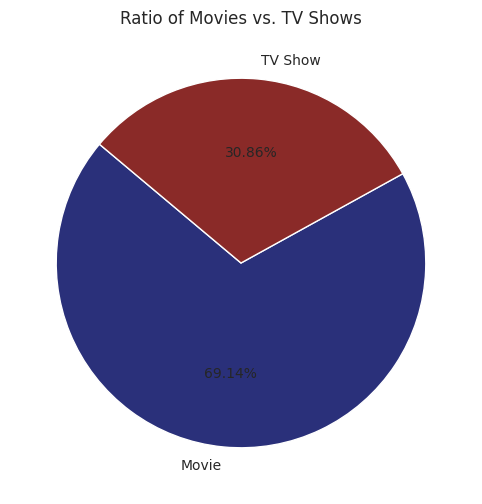

In [66]:
plt.figure(figsize=(8,6))
type_counts = df['type'].value_counts()
plt.pie(type_counts,labels=type_counts.index,autopct="%.2f%%",startangle=140,colors=['#2a307a', '#8a2a28'])
plt.title('Ratio of Movies vs. TV Shows')
plt.ylabel('')
plt.show()

here we can observe that no of movies is more in netflix

#### 4.2 How has content been added over time?

In [67]:
df.groupby(['year_added','type']).size()

year_added  type   
2008        Movie         1
            TV Show       1
2009        Movie         2
2010        Movie         1
2011        Movie        13
2012        Movie         3
2013        Movie         6
            TV Show       5
2014        Movie        19
            TV Show       6
2015        Movie        58
            TV Show      30
2016        Movie       256
            TV Show     184
2017        Movie       861
            TV Show     361
2018        Movie      1255
            TV Show     429
2019        Movie      1497
            TV Show     656
2020        Movie      1312
            TV Show     697
2021        Movie        88
            TV Show      29
dtype: int64

In [68]:
df.groupby(['year_added','type']).size().unstack()

type,Movie,TV Show
year_added,,
2008,1.0,1.0
2009,2.0,NaN
2010,1.0,NaN
2011,13.0,NaN
2012,3.0,NaN
2013,6.0,5.0
2014,19.0,6.0
2015,58.0,30.0
2016,256.0,184.0


<Figure size 1000x800 with 0 Axes>

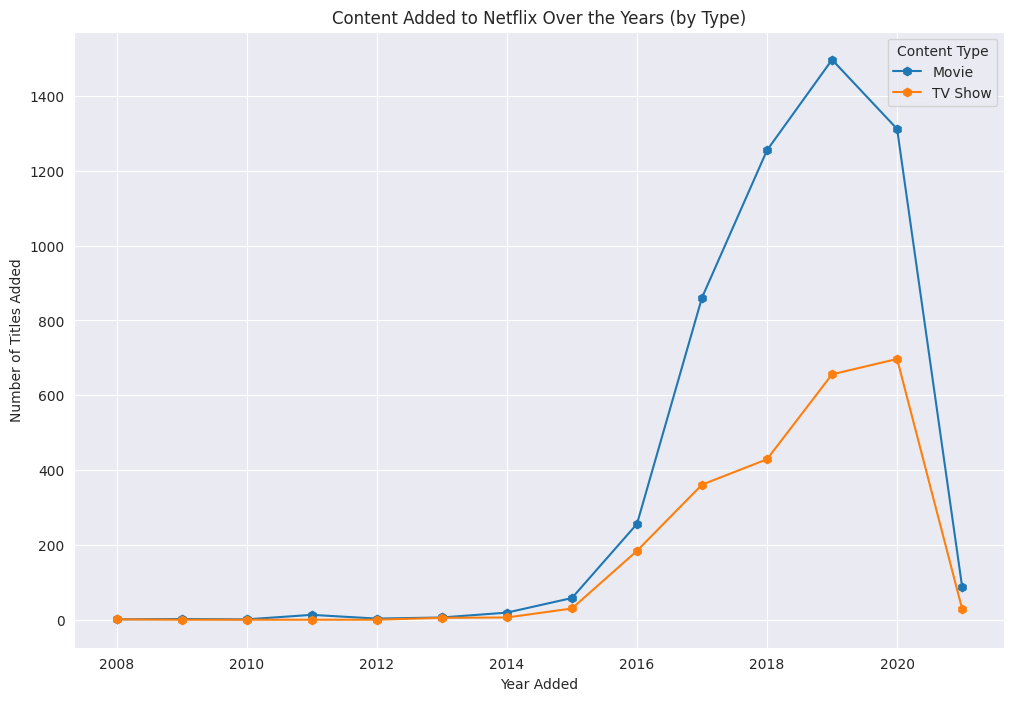

In [69]:
content_over_time = df.groupby(['year_added','type']).size().unstack().fillna(0)

plt.figure(figsize=(10,8))
content_over_time.plot(kind='line',marker='h',figsize=(12,8))
plt.title('Content Added to Netflix Over the Years (by Type)')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.legend(title='Content Type')
plt.grid(True)
plt.show()

here we can observe that the no. of movies is higher than the number of tv shows over the years and the no. of both the tv shows and the movies is increasing aswell<br><br> the dip in 2020 indicates the covid's consequences on this

#### 4.3 What are the most popular genres?

In [70]:
df['listed_in']

,listed_in
0,"International TV Shows, TV Dramas, TV Sci-Fi &..."
1,"Dramas, International Movies"
2,"Horror Movies, International Movies"
3,"Action & Adventure, Independent Movies, Sci-Fi..."
4,Dramas
...,...
7782,"Dramas, International Movies"
7783,"Dramas, International Movies, Music & Musicals"
7784,"Documentaries, International Movies, Music & M..."
7785,"International TV Shows, Reality TV"


In [71]:
df['listed_in'].str.split(',')

,listed_in
0,"[International TV Shows, TV Dramas, TV Sci-F..."
1,"[Dramas, International Movies]"
2,"[Horror Movies, International Movies]"
3,"[Action & Adventure, Independent Movies, Sci..."
4,[Dramas]
...,...
7782,"[Dramas, International Movies]"
7783,"[Dramas, International Movies, Music & Music..."
7784,"[Documentaries, International Movies, Music ..."
7785,"[International TV Shows, Reality TV]"


In [72]:
df['listed_in'].str.split(',',expand=True)

,0,1,2
0,International TV Shows,TV Dramas,TV Sci-Fi & Fantasy
1,Dramas,International Movies,None
2,Horror Movies,International Movies,None
3,Action & Adventure,Independent Movies,Sci-Fi & Fantasy
4,Dramas,None,None
...,...,...,...
7782,Dramas,International Movies,None
7783,Dramas,International Movies,Music & Musicals
7784,Documentaries,International Movies,Music & Musicals
7785,International TV Shows,Reality TV,None


In [73]:
df['listed_in'].str.split(',',expand=True).stack().reset_index(drop=True).value_counts()

,count
International Movies,2323
Dramas,1383
Comedies,1074
Documentaries,751
Dramas,722
...,...
Romantic Movies,3
Spanish-Language TV Shows,2
Sports Movies,1
TV Sci-Fi & Fantasy,1


In [93]:
genres=df['listed_in'].str.split(',',expand=True).stack().reset_index(drop=True).value_counts().reset_index()
genres.columns=['genre','count']
genres

,genre,count
0,International Movies,2323
1,Dramas,1383
2,Comedies,1074
3,Documentaries,751
4,Dramas,722
...,...,...
68,Romantic Movies,3
69,Spanish-Language TV Shows,2
70,Sports Movies,1
71,TV Sci-Fi & Fantasy,1


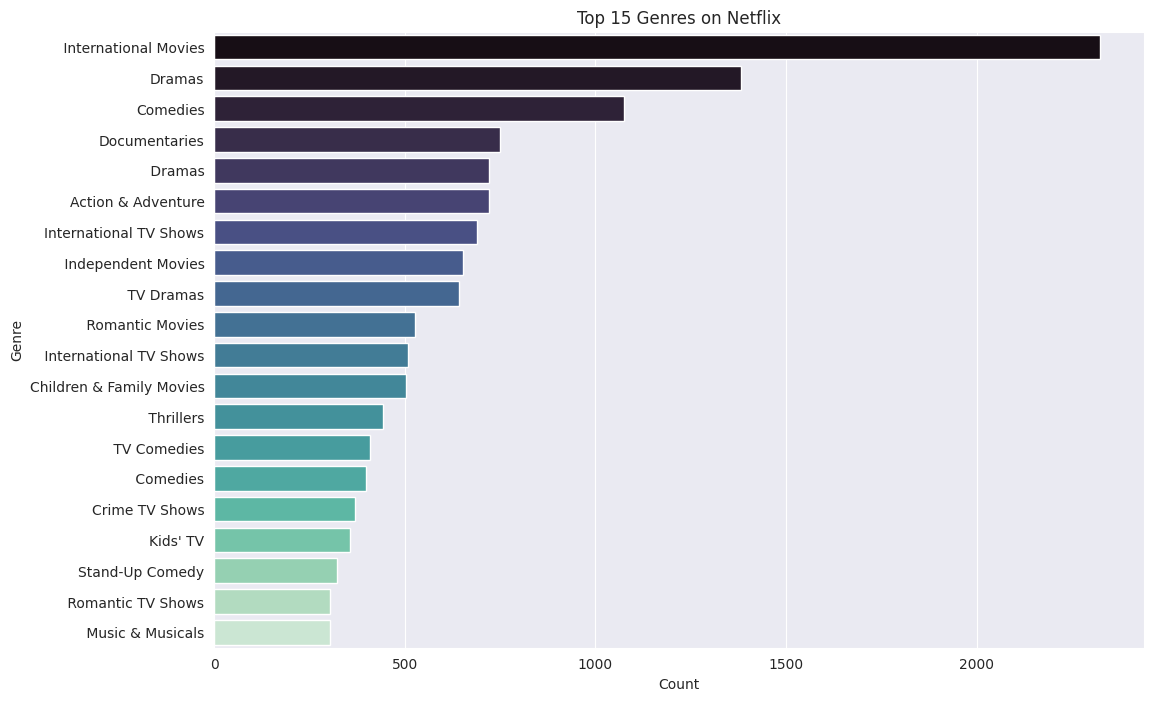

In [75]:
# Get the top 15 genres and their counts
top_genres_counts = df['listed_in'].str.split(',',expand=True).stack().reset_index(drop=True).value_counts()

# Convert the Series to a DataFrame for plotting and select only the top 15
top_genres_df = top_genres_counts.head(20).reset_index()
top_genres_df.columns = ['genre', 'count'] # Rename columns for clarity

plt.figure(figsize=(12, 8))
sns.barplot(y='genre', x='count', data=top_genres_df, palette='mako', hue='genre', legend=False)
plt.title('Top 15 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

international movies are the most released followed by dramas , comedies, documentaries

#### 4.4 What is the distribution of content duration?

In [76]:
# Separate movies and TV shows
movies_df = df[df['type'] == 'Movie'].copy()
tv_shows_df = df[df['type'] == 'TV Show'].copy()

In [97]:
movies_df['duration_min'] = movies_df['duration'].str.replace(" min","").astype(int)
movies_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,duration_min
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,93
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,78


In [78]:
tv_shows_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017,7


In [79]:
tv_shows_df['seasons'] = tv_shows_df['duration'].str.replace(" Seasons","").str.replace(" Season","").astype(int)

since its either season or seasons

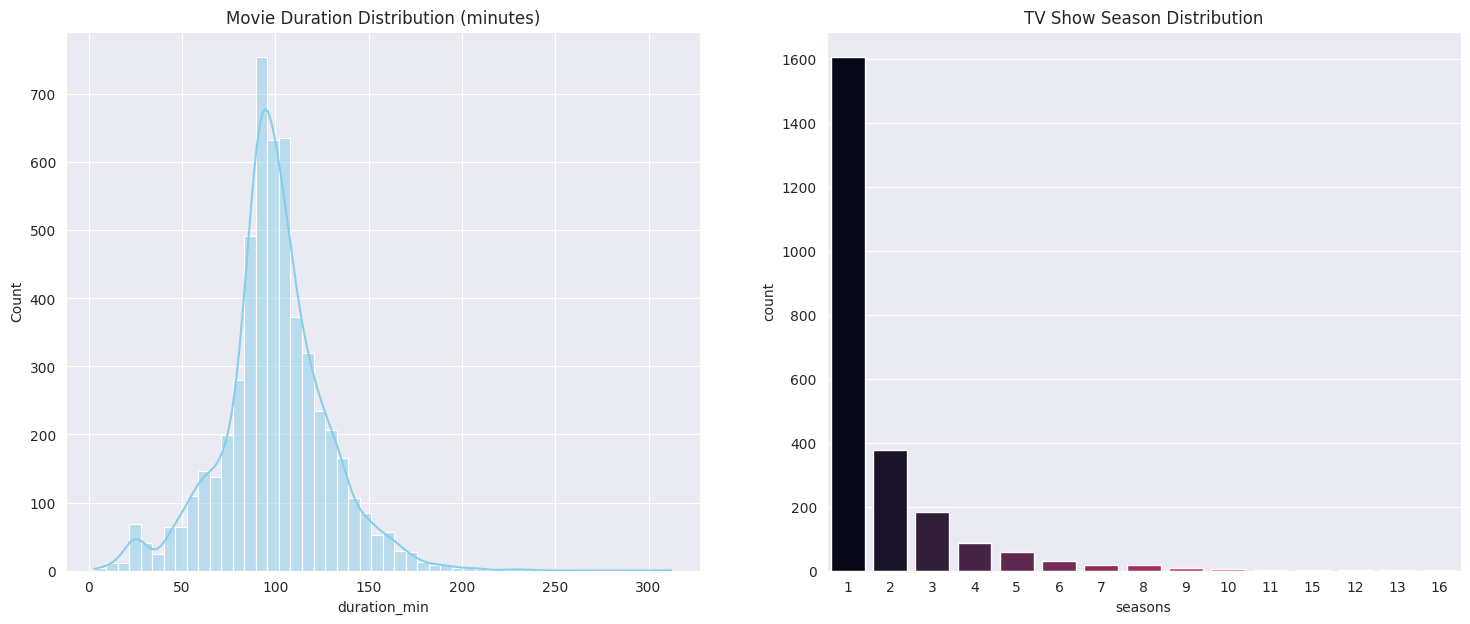

In [80]:
# Plot the distributions
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Movie Duration Distribution
sns.histplot(ax=axes[0], data=movies_df, x='duration_min', bins=50, kde=True, color='skyblue').set_title('Movie Duration Distribution (minutes)')

# TV Show Season Distribution
sns.countplot(ax=axes[1], x='seasons', data=tv_shows_df, palette='rocket', order=tv_shows_df['seasons'].value_counts().index, hue='seasons', legend=False).set_title('TV Show Season Distribution')

plt.show()

In [81]:
tv_shows_df['seasons'].value_counts().index

Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 15, 12, 13, 16], dtype='int64', name='seasons')

here we can see that most movies have runtime from 80 to 120 <br><br>
tv shows mostly have 1 season and becomes way less for 2 and above, since successful ones get into further seasons

#### 4.5 Where does the content come from? (Geographical Analysis)

In [82]:
# Handle the multi-country listings similar to genres
countries = df.assign(country=df['country'].str.split(', ')).explode('country')

In [83]:
df.assign(country=df['country'].str.split(', ')).explode('country').head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12


In [84]:
# Get the top 15 countries and their counts
top_countries_counts = countries['country'].value_counts().reset_index()
top_countries_counts.columns = ['country', 'count'] # Rename columns for clarity

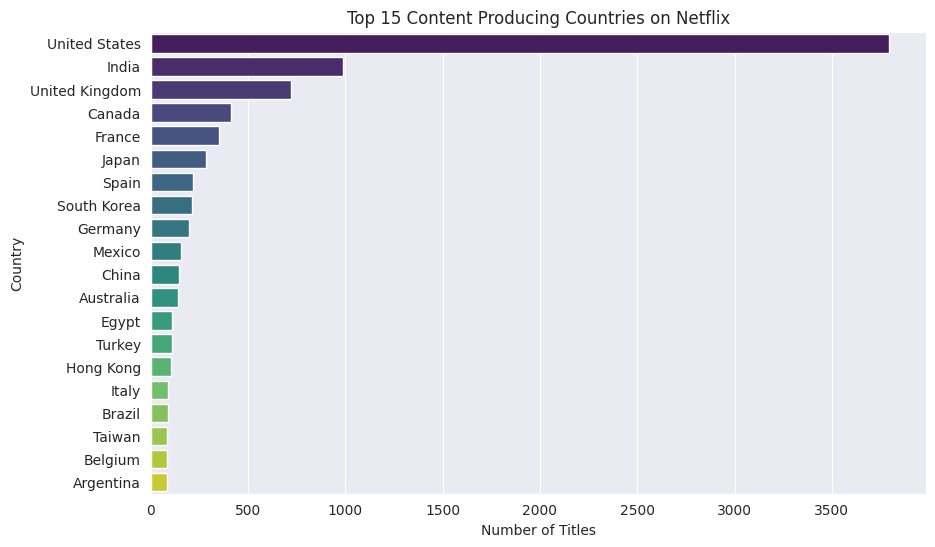

In [85]:
# Select only the top 15 for plotting
top_countries_counts_plot = top_countries_counts.head(20)

plt.figure(figsize=(10, 6))
sns.barplot(y='country', x='count', data=top_countries_counts_plot, palette='viridis', hue='country', legend=False)
plt.title('Top 15 Content Producing Countries on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

US is the highest number of movie produced follwed by india , UK, canada, france.

#### 4.6 What are the maturity ratings of the content?

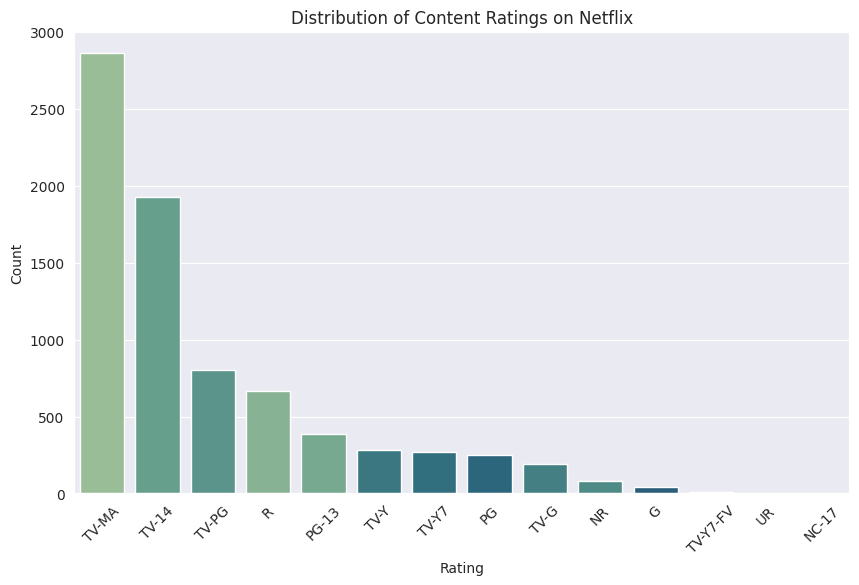

In [86]:
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index, palette='crest', hue='rating', legend=False)
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

here most shows are TV-MA or TV-14 which are mature content. these types are present more than children shows

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7770 entries, 0 to 7786
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7770 non-null   object        
 1   type          7770 non-null   object        
 2   title         7770 non-null   object        
 3   director      7770 non-null   object        
 4   cast          7770 non-null   object        
 5   country       7770 non-null   object        
 6   date_added    7770 non-null   datetime64[ns]
 7   release_year  7770 non-null   int64         
 8   rating        7770 non-null   object        
 9   duration      7770 non-null   object        
 10  listed_in     7770 non-null   object        
 11  description   7770 non-null   object        
 12  year_added    7770 non-null   int32         
 13  month_added   7770 non-null   int32         
dtypes: datetime64[ns](1), int32(2), int64(1), object(10)
memory usage: 1.1+ MB


In [95]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,age_on_netflix
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,0


### Step 5: Feature Engineering - Content Freshness
Let's create a new feature to analyze how old content is when it gets added to Netflix. This can tell us about their acquisition strategy (buying old classics vs. releasing new originals).

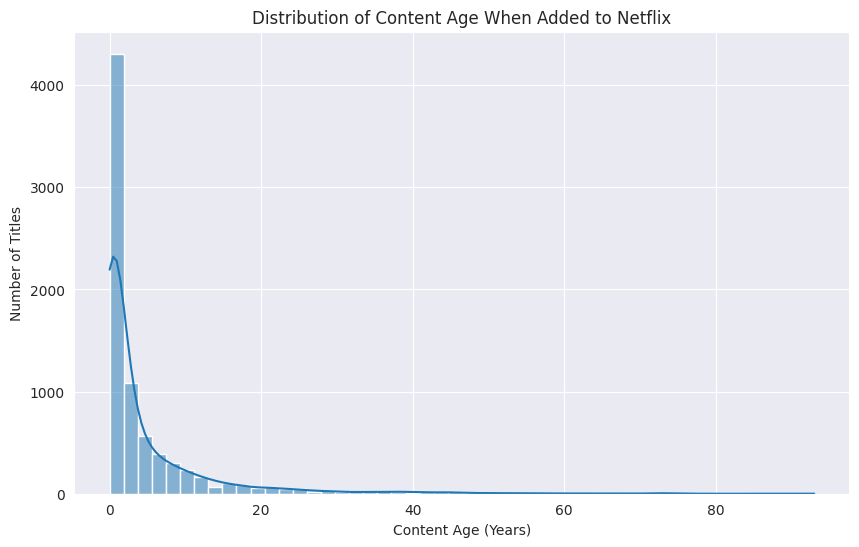

In [89]:
## Create 'age_on_netflix' feature
df['age_on_netflix'] = df['year_added'] - df['release_year']

content_age = df[df['age_on_netflix'] >= 0].copy()

plt.figure(figsize=(10, 6))
sns.histplot(data=content_age, x='age_on_netflix', bins=50, kde=True)
plt.title('Distribution of Content Age When Added to Netflix')
plt.xlabel('Content Age (Years)')
plt.ylabel('Number of Titles')
plt.show()

here we can observe that the content released is fresh and recent and only the classics and content of importance are released from 20+ years old

### Step 6: Deeper Multivariate Analysis

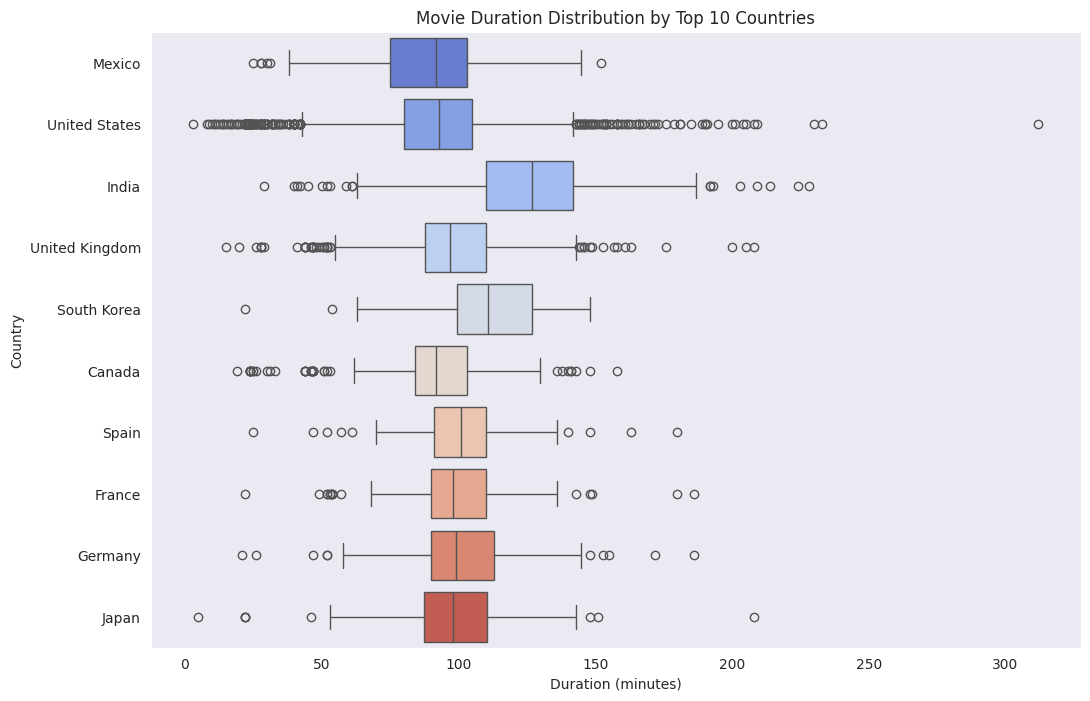

In [99]:
# avg duration of movies for top 10 movie producing country
movie_countries = countries[countries['type'] == 'Movie'].copy()
top_10_country_names = top_countries_counts['country'].head(10).tolist()


movie_countries_top_10 = movie_countries[movie_countries['country'].isin(top_10_country_names)].copy()
movie_countries_top_10['duration_min'] = movie_countries_top_10['duration'].str.replace(' min', '').astype(int)

plt.figure(figsize=(12, 8))
sns.boxplot(data=movie_countries_top_10, x='duration_min', y='country', palette='coolwarm', hue='country', legend=False)
plt.title('Movie Duration Distribution by Top 10 Countries')
plt.xlabel('Duration (minutes)')
plt.ylabel('Country')
plt.grid(axis='x')
plt.show()

we can see that the avg duration of movies in india followed by south korea is high maybe because it produces mostly dramatic films


### Step 7: Word Cloud from Content Descriptions
As a final visual analysis, let's generate a word cloud from the `description` column to see what themes and words are most common in Netflix content.

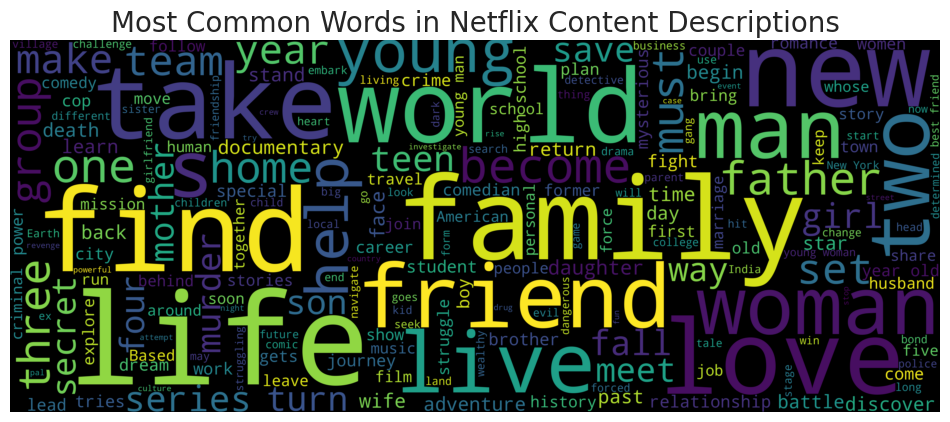

In [103]:
# Combine all descriptions into a single string
text = ' '.join(df['description'])

# Create and generate a word cloud image
wordcloud = WordCloud(width=5000, height=2000, background_color='black').generate(text)

# Display the generated image
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Content Descriptions', fontsize=20)
plt.show()

### Step 8: Final Conclusion and Summary of Insights

This in-depth EDA of the Netflix dataset has revealed several key characteristics and strategies of the platform's content library.

**Key Findings:**
1. **Content Strategy:** Netflix's library is movie-heavy (~70%), and the platform aggressively added content between 2016-2019. Their strategy involves a mix of brand new originals (added the same year they are released) and a deep library of licensed older content.
2. **Global Dominance:** While the US is the top content producer, the platform is heavily international, with India being a massive contributor. This is reflected in the top genres ("International Movies") and most frequent actors.
3. **Target Audience:** The content library is skewed towards mature audiences, with `TV-MA` and `TV-14` being the most common ratings.
4. **Content Format & Genre:** Dramas and Comedies are universally popular genres. Most movies stick to a standard 90-120 minute runtime, while the vast majority of TV shows only last for a single season, suggesting a high-risk, high-reward approach to series production.
5. **Common Themes:** Descriptions of content frequently revolve around universal themes of life, family, love, and discovery.

**Limitations:** This dataset is a snapshot in time and lacks viewership data. Therefore, our analysis is of the *supply* of content, not its *demand* or popularity. Nonetheless, this EDA provides a strong, multi-faceted understanding of the composition and evolution of the Netflix library.

## Questions :
1. How has the distribution of content ratings changed over time?
2. Is there a relationship between content age and its type (Movie vs. TV Show)?
3. Can we identify any trends in content production based on the release year vs. the year added to Netflix?
4. What are the most common word pairs or phrases in content descriptions?
5. Who are the top directors on Netflix?

### 1. How has the distribution of content ratings changed over time?

A line plot to visualize the trend of content ratings for movies over their release years.

In [109]:
movies_df_ratings = df[df['type'] == 'Movie'].copy()
print(movies_df_ratings.head())

  show_id   type  title           director  \
1      s2  Movie   7:19  Jorge Michel Grau   
2      s3  Movie  23:59       Gilbert Chan   
3      s4  Movie      9        Shane Acker   
4      s5  Movie     21     Robert Luketic   
6      s7  Movie    122    Yasir Al Yasiri   

                                                cast        country  \
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   
6  Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...          Egypt   

  date_added  release_year rating duration  \
1 2016-12-23          2016  TV-MA   93 min   
2 2018-12-20          2011      R   78 min   
3 2017-11-16          2009  PG-13   80 min   
4 2020-01-01          2008  PG-13  123 min   
6 2020-06-01          2019  TV-MA   95 min   

                   

In [110]:
ratings_by_year = movies_df_ratings.groupby(['release_year', 'rating']).size().unstack(fill_value=0)
print(ratings_by_year.head())

rating        G  NC-17  NR  PG  PG-13  R  TV-14  TV-G  TV-MA  TV-PG  TV-Y  \
release_year                                                                
1942          0      0   0   0      0  0      2     0      0      0     0   
1943          0      0   0   0      0  0      0     0      0      3     0   
1944          0      0   0   0      0  0      2     0      0      1     0   
1945          0      0   0   0      0  0      2     0      1      0     0   
1946          0      0   0   0      0  0      0     0      0      1     0   

rating        TV-Y7  TV-Y7-FV  UR  
release_year                       
1942              0         0   0  
1943              0         0   0  
1944              0         0   0  
1945              0         0   0  
1946              0         0   0  


<Figure size 1500x800 with 0 Axes>

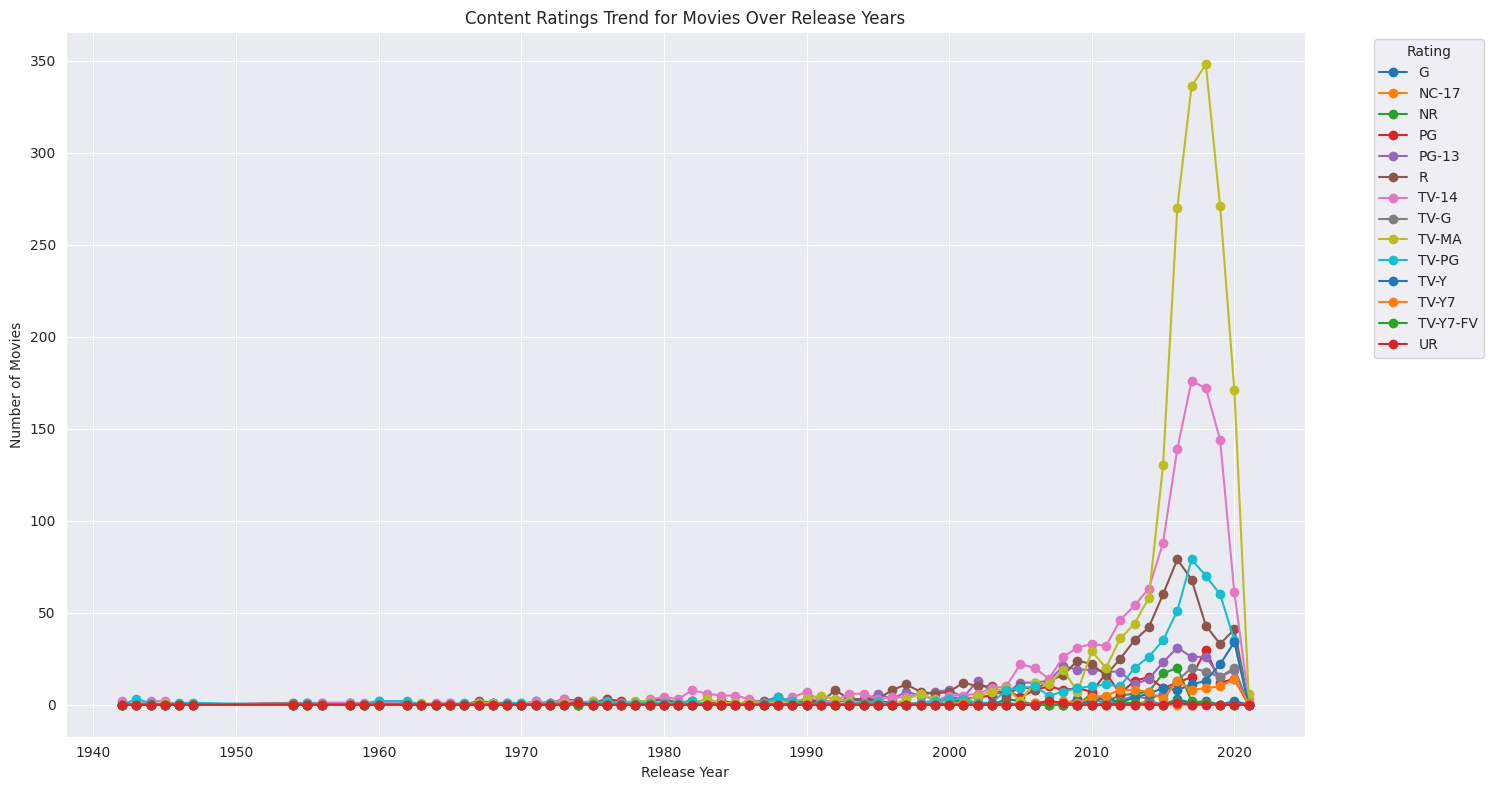

In [111]:
plt.figure(figsize=(15, 8))
ratings_by_year.plot(kind='line', marker='o', figsize=(15, 8))
plt.title('Content Ratings Trend for Movies Over Release Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

we can observe that the number of tv-ma and pg-13 is way higher than other types with increasing rate of mature contents.

### 2. Is there a relationship between content age and its type (Movie vs. TV Show)?

In [115]:

print(movies_df.head())
print(tv_shows_df.head())

  show_id   type  title           director  \
1      s2  Movie   7:19  Jorge Michel Grau   
2      s3  Movie  23:59       Gilbert Chan   
3      s4  Movie      9        Shane Acker   
4      s5  Movie     21     Robert Luketic   
6      s7  Movie    122    Yasir Al Yasiri   

                                                cast        country  \
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   
6  Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...          Egypt   

  date_added  release_year rating duration  \
1 2016-12-23          2016  TV-MA   93 min   
2 2018-12-20          2011      R   78 min   
3 2017-11-16          2009  PG-13   80 min   
4 2020-01-01          2008  PG-13  123 min   
6 2020-06-01          2019  TV-MA   95 min   

                   

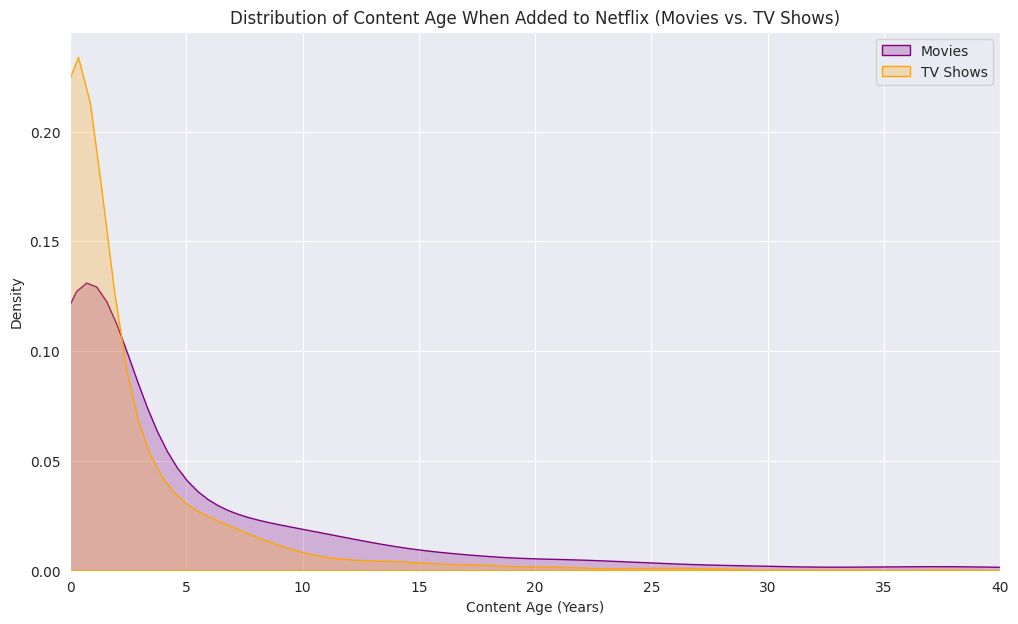

In [118]:
movies_df = df[df['type'] == 'Movie'].copy()
tv_shows_df = df[df['type'] == 'TV Show'].copy()

plt.figure(figsize=(12, 7))
sns.kdeplot(data=movies_df, x='age_on_netflix', label='Movies', fill=True, color='purple')
sns.kdeplot(data=tv_shows_df, x='age_on_netflix', label='TV Shows', fill=True, color='orange')
plt.title('Distribution of Content Age When Added to Netflix (Movies vs. TV Shows)')
plt.xlabel('Content Age (Years)')
plt.ylabel('Density')
plt.xlim(0, 40)
plt.legend()
plt.grid(True)
plt.show()

here we can see that the number of tv shows is more released more compared to movies for time period below 2 years but beyond that more movies are added compared to the tv shows

### 3. Can we identify any trends in content production based on the release year vs. the year added to Netflix?

In [119]:
avg_age_by_release_year = df.groupby('release_year')['age_on_netflix'].mean().reset_index()
print(avg_age_by_release_year.head())

   release_year  age_on_netflix
0          1925            93.0
1          1942            75.0
2          1943            74.0
3          1944            73.0
4          1945            72.0


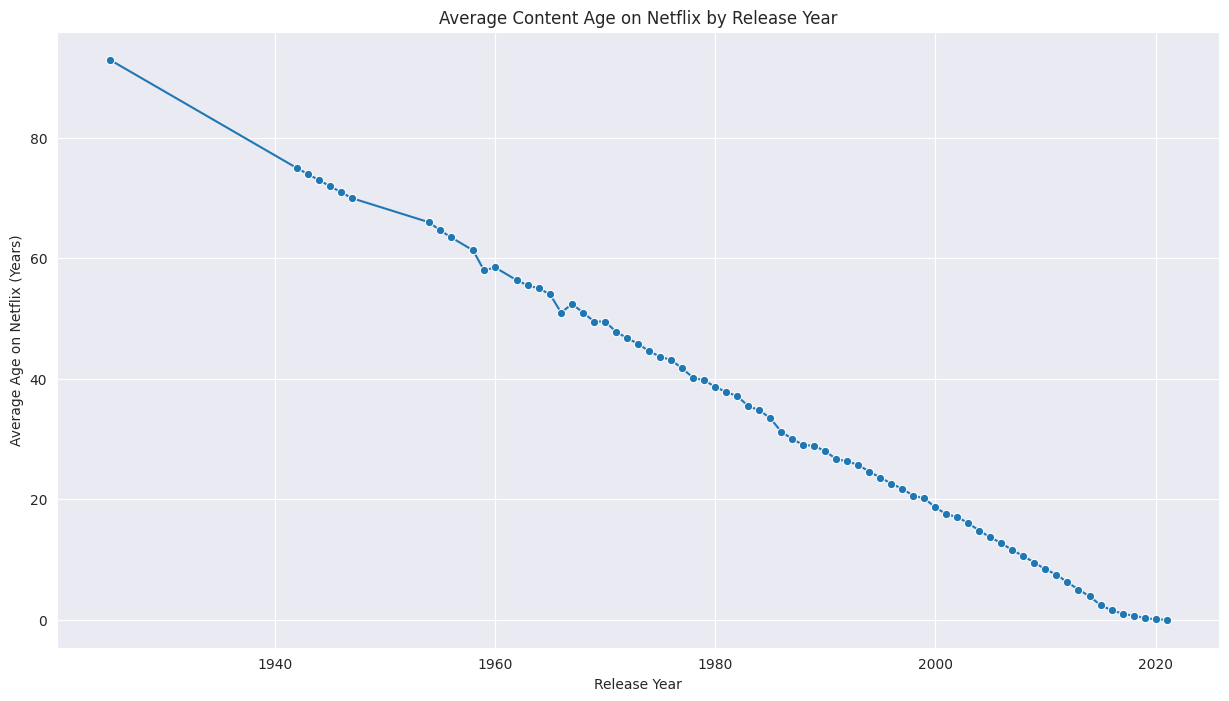

In [120]:
plt.figure(figsize=(15, 8))
sns.lineplot(data=avg_age_by_release_year, x='release_year', y='age_on_netflix', marker='o')
plt.title('Average Content Age on Netflix by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Age on Netflix (Years)')
plt.grid(True)
plt.show()

In [121]:
df_genres_exploded = df.assign(listed_in=df['listed_in'].str.split(', ')).explode('listed_in')
print(df_genres_exploded.head())


  show_id     type title           director  \
0      s1  TV Show    3%            Unknown   
0      s1  TV Show    3%            Unknown   
0      s1  TV Show    3%            Unknown   
1      s2    Movie  7:19  Jorge Michel Grau   
1      s2    Movie  7:19  Jorge Michel Grau   

                                                cast country date_added  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...  Brazil 2020-08-14   
0  João Miguel, Bianca Comparato, Michel Gomes, R...  Brazil 2020-08-14   
0  João Miguel, Bianca Comparato, Michel Gomes, R...  Brazil 2020-08-14   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...  Mexico 2016-12-23   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...  Mexico 2016-12-23   

   release_year rating   duration               listed_in  \
0          2020  TV-MA  4 Seasons  International TV Shows   
0          2020  TV-MA  4 Seasons               TV Dramas   
0          2020  TV-MA  4 Seasons     TV Sci-Fi & Fantasy   
1          2016  TV-MA

In [122]:
filtered_genres_df = df_genres_exploded[df_genres_exploded['release_year'] >= 1980].copy()
print(filtered_genres_df.head())

  show_id     type title           director  \
0      s1  TV Show    3%            Unknown   
0      s1  TV Show    3%            Unknown   
0      s1  TV Show    3%            Unknown   
1      s2    Movie  7:19  Jorge Michel Grau   
1      s2    Movie  7:19  Jorge Michel Grau   

                                                cast country date_added  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...  Brazil 2020-08-14   
0  João Miguel, Bianca Comparato, Michel Gomes, R...  Brazil 2020-08-14   
0  João Miguel, Bianca Comparato, Michel Gomes, R...  Brazil 2020-08-14   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...  Mexico 2016-12-23   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...  Mexico 2016-12-23   

   release_year rating   duration               listed_in  \
0          2020  TV-MA  4 Seasons  International TV Shows   
0          2020  TV-MA  4 Seasons               TV Dramas   
0          2020  TV-MA  4 Seasons     TV Sci-Fi & Fantasy   
1          2016  TV-MA

In [123]:
top_10_genres = filtered_genres_df['listed_in'].value_counts().head(10).index.tolist()
print(f"Top 10 Genres: {top_10_genres}")

Top 10 Genres: ['International Movies', 'Dramas', 'Comedies', 'International TV Shows', 'Documentaries', 'TV Dramas', 'Action & Adventure', 'Independent Movies', 'Children & Family Movies', 'Romantic Movies']


In [124]:
filtered_top_genres_df = filtered_genres_df[filtered_genres_df['listed_in'].isin(top_10_genres)].copy()
print(filtered_top_genres_df.head())

  show_id     type  title           director  \
0      s1  TV Show     3%            Unknown   
0      s1  TV Show     3%            Unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   

                                                cast    country date_added  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...     Brazil 2020-08-14   
0  João Miguel, Bianca Comparato, Michel Gomes, R...     Brazil 2020-08-14   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...     Mexico 2016-12-23   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...     Mexico 2016-12-23   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...  Singapore 2018-12-20   

   release_year rating   duration               listed_in  \
0          2020  TV-MA  4 Seasons  International TV Shows   
0          2020  TV-MA  4 Seasons               TV Dramas   
1          2016  TV-MA     93 min                  Dramas  

In [125]:
avg_age_by_genre_year = filtered_top_genres_df.groupby(['release_year', 'listed_in'])['age_on_netflix'].mean().reset_index()
print(avg_age_by_genre_year.head())

   release_year                 listed_in  age_on_netflix
0          1980        Action & Adventure       38.600000
1          1980  Children & Family Movies       39.000000
2          1980                  Comedies       38.666667
3          1980             Documentaries       40.000000
4          1980                    Dramas       38.750000


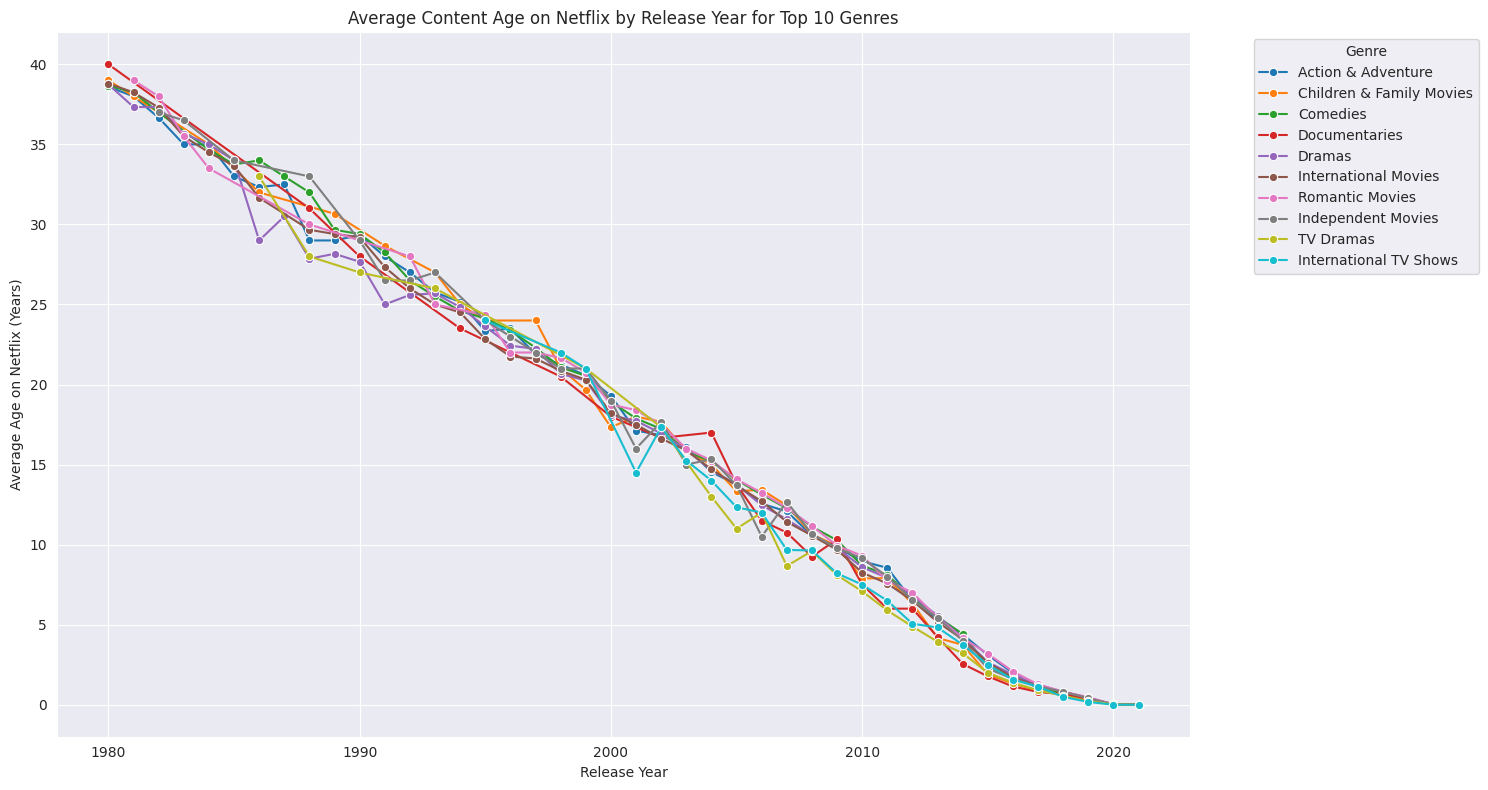

In [126]:
plt.figure(figsize=(15, 8))
sns.lineplot(data=avg_age_by_genre_year, x='release_year', y='age_on_netflix', hue='listed_in', marker='o')
plt.title('Average Content Age on Netflix by Release Year for Top 10 Genres')
plt.xlabel('Release Year')
plt.ylabel('Average Age on Netflix (Years)')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

thus the content genre doesnt impact much for the acquisition of content by netflix rather the freshness of content is taken more into account and we can see the tradeoff between the classics and new content here

### 4. What are the most common word pairs or phrases in content descriptions?

In [139]:

all_descriptions = ' '.join(df['description'].dropna().astype(str))


translator = str.maketrans('', '', string.punctuation)
cleaned_description = all_descriptions.lower().translate(translator)


words = cleaned_description.split()

bigrams = []
for i in range(len(words) - 1):
    bigrams.append(f'{words[i]} {words[i+1]}')

bigram_counts = Counter(bigrams)

for bigram, count in bigram_counts.most_common(100):
    print(f"{bigram}: {count}")

First 10 most common bigrams:
in a: 631
in this: 613
in the: 601
of the: 582
of a: 495
with a: 410
on a: 391
a young: 369
when a: 350
to the: 338
and a: 334
for a: 332
on the: 327
and his: 318
and the: 281
to a: 279
of his: 256
as a: 243
with the: 221
for the: 212
this documentary: 203
a new: 200
with his: 200
– and: 189
from the: 184
after a: 184
into a: 184
by a: 178
group of: 174
from a: 168
at the: 168
the world: 168
and her: 163
to find: 161
at a: 156
to be: 148
into the: 148
a group: 146
as they: 145
tries to: 139
to save: 138
with her: 136
of their: 134
a woman: 130
high school: 128
when he: 120
to his: 118
based on: 118
a man: 111
in an: 107
by the: 106
of her: 106
to help: 103
out to: 102
young man: 101
when his: 101
for his: 100
in love: 98
as the: 97
in his: 97
one of: 96
his life: 96
a mysterious: 94
as he: 92
young woman: 90
for her: 89
his own: 88
their lives: 86
out of: 85
up to: 85
series of: 85
to get: 85
returns to: 84
and more: 84
world of: 83
new york: 82
of an: 82


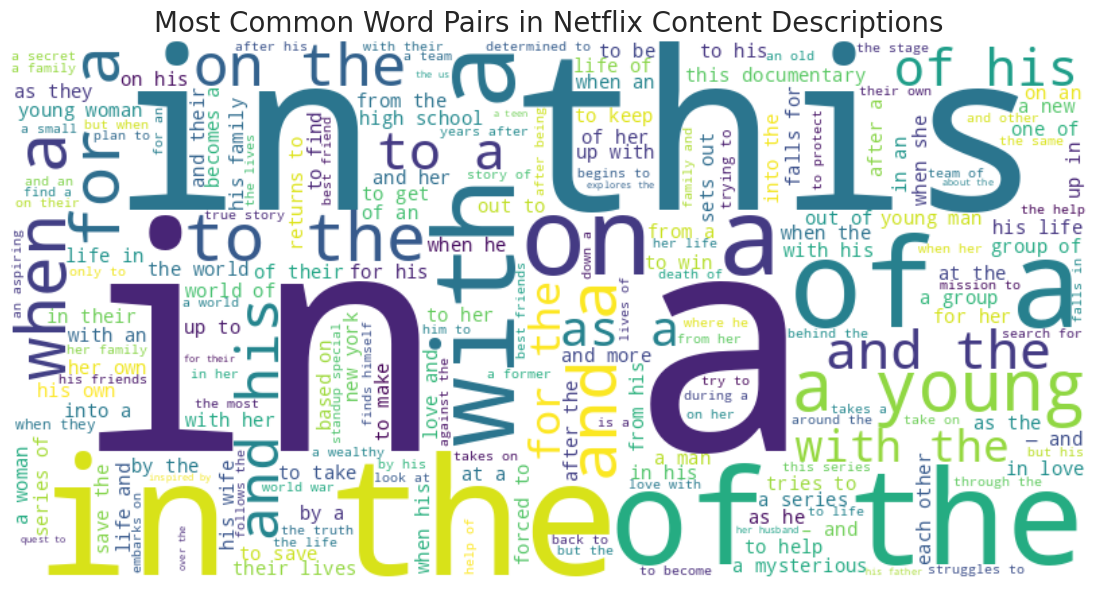

In [140]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create and generate a word cloud image from bigrams
wordcloud_bigrams = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(bigram_counts)

# Display the generated image
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud_bigrams, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Word Pairs in Netflix Content Descriptions', fontsize=20)
plt.show()

here the word pairs dont have that much meaning still in this, in a , in the , with a , are common pair words in the content description

### 5. Who are the top directors on Netflix?

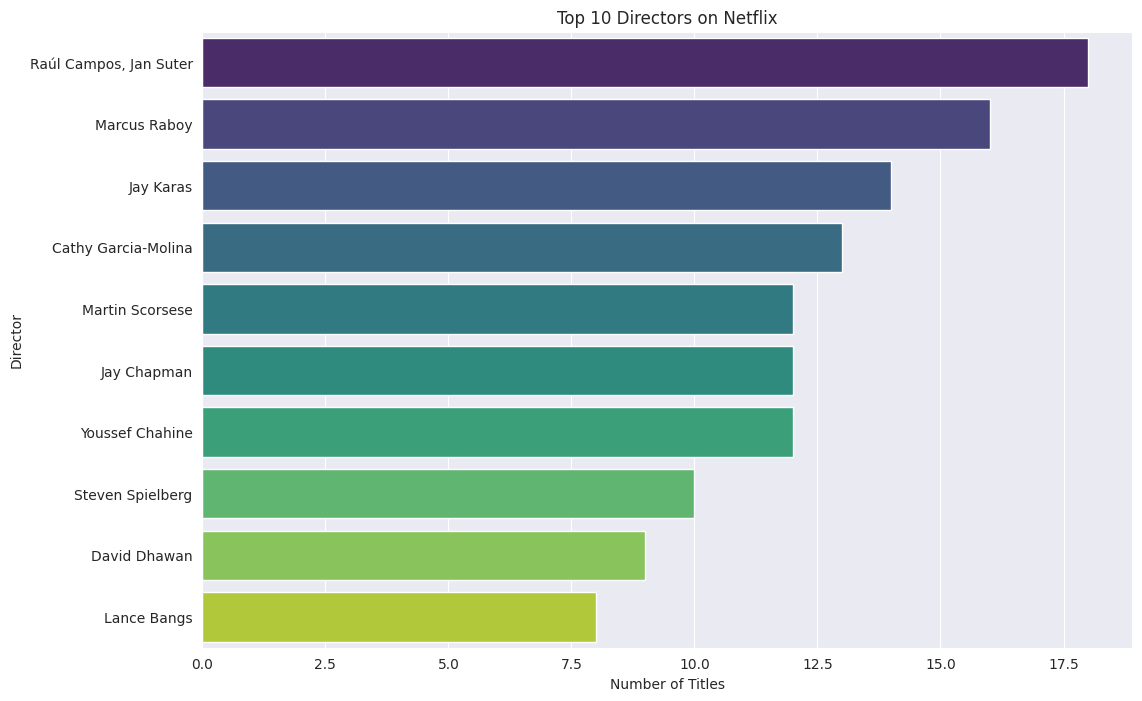

In [141]:
top_directors = df[df['director'] != 'Unknown']['director'].value_counts().head(10).reset_index()
top_directors.columns = ['director', 'count']

plt.figure(figsize=(12, 8))
sns.barplot(y='director', x='count', data=top_directors, palette='viridis', hue='director', legend=False)
plt.title('Top 10 Directors on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

here we have listed out the top 10 directors by content count